In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('business.retailsales.csv')

In [4]:
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


# Quick EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [6]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [7]:
df.isna().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [8]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = dfDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,Product Type,object,8,0.45,18,"[Fair Trade Gifts, Home Decor]"
1,Net Quantity,int64,0,0.00,42,"[6, 96]"
2,Gross Sales,float64,0,0.00,388,"[1062.0, 48.0]"
3,Discounts,float64,0,0.00,295,"[-2.59, -2.8]"
4,Returns,float64,0,0.00,62,"[-54.0, -38.0]"
5,Total Net Sales,float64,0,0.00,729,"[64.8, 888.0]"


In [9]:
df.dropna(inplace=True)

In [63]:
df['dc_percent'] = abs(round(-df['Discounts']/df['Gross Sales']*100,2))
df.reset_index(inplace=True, drop=True)
df.drop(columns='index', inplace=True)

In [64]:
df.iloc[1766,6] = 0

In [65]:
df

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,dc_percent
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00,3.98
1,Basket,13,3744.0,-316.80,0.00,3427.20,8.46
2,Basket,12,3825.0,-201.60,-288.00,3335.40,5.27
3,Basket,17,3035.0,-63.25,0.00,2971.75,2.08
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64,1.64
...,...,...,...,...,...,...,...
1762,Kitchen,0,28.0,-2.81,-25.19,0.00,10.04
1763,Jewelry,0,28.0,0.00,-28.00,0.00,0.00
1764,Basket,0,116.0,-23.20,-92.80,0.00,20.00
1765,Kitchen,0,16.5,0.00,-16.50,0.00,0.00


In [66]:
df[['Product Type', 'Returns']].groupby('Product Type').agg(['count','mean'])

Returns          
                   count      mean
Product Type                      
Accessories           39  0.000000
Art & Sculpture      337 -8.545786
Basket               551 -8.057514
Christmas             73 -9.178082
Easter                 1  0.000000
Fair Trade Gifts      28  0.000000
Furniture             16  0.000000
Gift Baskets           1  0.000000
Home Decor           131 -3.231679
Jewelry              210 -2.424762
Kids                  63  0.000000
Kitchen              161 -2.037702
Music                 29 -4.910690
One-of-a-Kind         12  0.000000
Recycled Art          23  0.000000
Skin Care             11  0.000000
Soapstone             67 -1.037313
Textiles              14 -6.928571

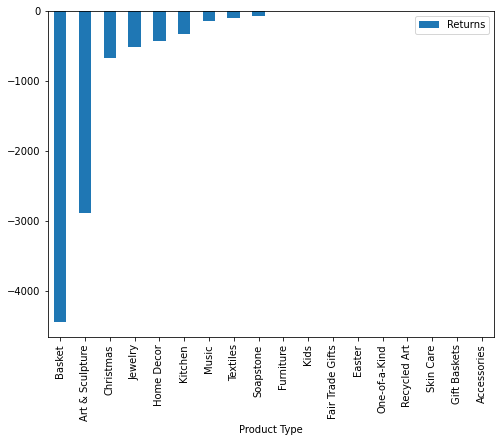

In [67]:
df[['Product Type', 'Returns']].groupby('Product Type').sum().sort_values(by='Returns').plot.bar(figsize=(8,6))
plt.xticks(rotation=90)
plt.show()

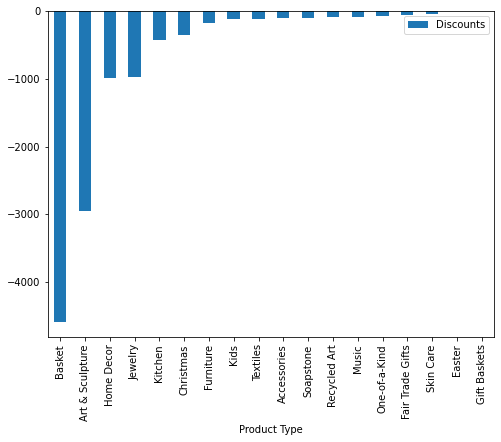

In [68]:
df[['Product Type', 'Discounts']].groupby('Product Type').sum().sort_values(by='Discounts').plot.bar(figsize=(8,6))
plt.xticks(rotation=90)
plt.show()

<Figure size 576x432 with 0 Axes>

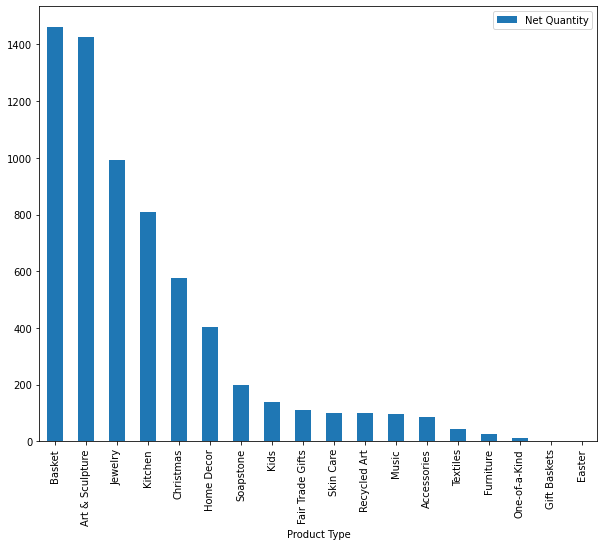

In [69]:
plt.figure(figsize=(8,6))
df[['Product Type', 'Net Quantity']].groupby('Product Type').sum().sort_values(by='Net Quantity', ascending=False).plot.bar(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

In [70]:
df[['Net Quantity', 'Returns']].groupby('Net Quantity').agg(['count','mean'])

Returns             
               count         mean
Net Quantity                     
-1                 1  -106.250000
 0                12   -75.273333
 1               738    -2.052846
 2               350    -3.363057
 3               204    -5.307353
 4               107    -2.897196
 5                67    -2.669851
 6                52    -6.519231
 7                43    -6.232558
 8                28    -7.957143
 9                23    -9.087391
 10               17    -5.365294
 11               14     0.000000
 12               12   -27.083333
 13               14   -16.429286
 14                5     0.000000
 15               12    -1.500000
 16               13    -3.046154
 17                6   -18.333333
 18                9   -46.666667
 19                4     0.000000
 20                4   -27.500000
 21                3   -28.000000
 22                3    -6.600000
 24                2     0.000000
 25                4     0.000000
 29                2   -28.000000
 30                2     0.000000
 31                1     0.000000
 32                2     0.000000
 33                1     0.000000
 34                1 -1609.000000
 37                1     0.000000
 40                1   -56.000000
 42                1   -14.000000
 45                1    -8.540000
 47                1     0.000000
 58                2     0.000000
 59                1     0.000000
 69                1     0.000000
 90                1     0.000000
 96                1   -56.000000

In [71]:
df.corr()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,dc_percent
Net Quantity,1.000000,0.467208,-0.318341,-0.132757,0.492879,-0.015031
Gross Sales,0.467208,1.000000,-0.852117,-0.725465,0.996826,0.017372
Discounts,-0.318341,-0.852117,1.000000,0.590253,-0.838753,-0.289022
Returns,-0.132757,-0.725465,0.590253,1.000000,-0.671602,0.014163
Total Net Sales,0.492879,0.996826,-0.838753,-0.671602,1.000000,0.006405
dc_percent,-0.015031,0.017372,-0.289022,0.014163,0.006405,1.000000


In [72]:
Model_LR = LinearRegression()

In [76]:
df1 = pd.get_dummies(data = df, columns=['Product Type'],prefix_sep='_')

In [77]:
x = df1.drop(columns='Returns')
y = df1['Returns']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=69)

In [78]:
Model_LR.fit(xtrain, ytrain)

LinearRegression()

In [80]:
Model_LR_ytrain_pred = Model_LR.predict(xtrain)
Model_LR_ytest_pred = Model_LR.predict(xtest)

In [81]:
hasilLR = {
    "Model" : "Basic Model",
    "r2_train" : r2_score(ytrain, Model_LR_ytrain_pred),
    "MAE_train" : mean_absolute_error(ytrain, Model_LR_ytrain_pred),
    "MSE_train" : mean_squared_error(ytrain, Model_LR_ytrain_pred),
    "RMSE_train" : np.sqrt(mean_squared_error(ytrain, Model_LR_ytrain_pred)),
    "r2_test" : r2_score(ytest, Model_LR_ytest_pred),
    "MAE_test" : mean_absolute_error(ytest, Model_LR_ytest_pred),
    "MSE_test" : mean_squared_error(ytest, Model_LR_ytest_pred),
    "RMSE_test" : np.sqrt(mean_squared_error(ytest, Model_LR_ytest_pred))
}

In [82]:
df_hasilLR = pd.DataFrame(data = hasilLR.values(), index=hasilLR.keys()).T
df_hasilLR

,Model,r2_train,MAE_train,MSE_train,RMSE_train,r2_test,MAE_test,MSE_test,RMSE_test
0,Basic Model,0.989097,0.201739,7.919897,2.814231,0.999992,0.122218,0.062506,0.250012
